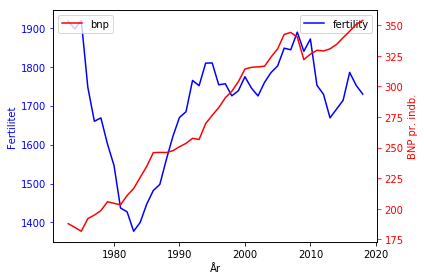

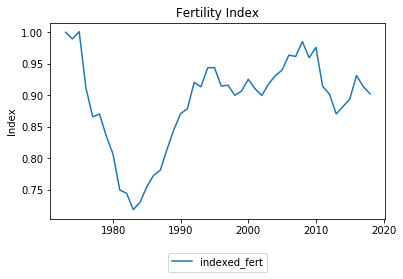

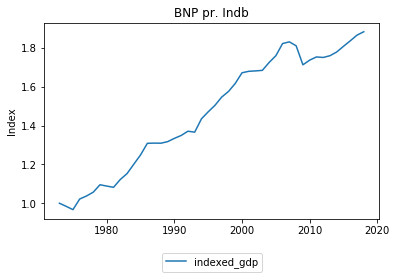

In [165]:
# Importing modules and packages
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as pd
import pandas as pd
import ipywidgets as widgets


# Creating and renaming columns in dataset in a dictionary
columns_dict = {}
columns_dict['Unnamed: 0'] = 'year'
columns_dict['Samlet fertilitet'] = 'fertility'


# Reading in Excelfile from Danmarks statistik
fert = pd.read_excel('FOD33.xlsx',skiprows=2)

# Dropping columns for cleaner dataset
fert.drop(['15 år','16 år','17 år','18 år','19 år','20 år','21 år','22 år','23 år','24 år','25 år','26 år','27 år',
          '28 år','29 år','30 år','31 år','32 år','33 år','34 år','35 år','36 år','37 år','38 år','39 år','40 år',
          '41 år','42 år','43 år','44 år','45 år','46 år','47 år','48 år','49 år','Bruttoreproduktionstal',
          'Nettoreproduktionstal'],axis=1,inplace=True)

# Renaming variables
fert.rename(columns=columns_dict,inplace=True)

# Getting summary statistics from the dataset
fert.describe()

# Creating and renaming columns in second dataset in a dictionary
col_dict = {}
col_dict['Unnamed: 0'] = 'type'
col_dict['Pr. indbygger, 2010-priser, kædede værdier, (1000 kr.)'] = 'bnp'
col_dict['Unnamed: 1'] = 'year'

# Reading in second excelfile from Danmarks statistik
gdp = pd.read_excel('NAN1.xlsx',skiprows=2)

# Dropping columns to keep the relevant statistics for the analysis
gdp.drop(['Løbende priser, (mia. kr.)','2010-priser, kædede værdier, (mia. kr.)',
          'Realvækst i pct. i forhold til foregående periode',
                     'Pr. indbygger, løbende priser, (1000 kr.)',
          'Bidrag til realvækst i BNP, (procentpoint)'],axis=1,inplace=True)

# Renaming variables
gdp.rename(columns=col_dict,inplace=True)

# Dropping extra data, so only the GDP remains
for val in ['BNP']: 
    I = gdp.type.str.contains(val)
    gdp = gdp.loc[I == True]
    
# Summary statistics for the dataset
gdp.describe()

# Merging the two datasets on the variable year
full_data = pd.merge(fert,gdp,how='left',on=['year'])

# Leaving out the column Type for a neater looking dataset
full_data = full_data.drop(columns='type')

# Summary statistics for the merged dataset
full_data.describe()

# Creating a plot with two y-axes, starting with defining the first y-axis and plot
fig, ax1 = plt.subplots()
t = full_data.year
s1 = full_data.fertility
ax1.plot(t, s1, 'b-')
ax1.set_xlabel('År')

# Labeling the axis coloring the series line and adding a legend
ax1.set_ylabel('Fertilitet', color='b')
ax1.tick_params('y', colors='b')
ax1.legend()

# Setting up the second y-axis and plot
ax2 = ax1.twinx()
s2 = full_data.bnp
ax2.plot(t, s2, 'r')
ax2.set_ylabel('BNP pr. indb.', color='r')
ax2.tick_params('y', colors='r')
ax2.legend()

# Setting the layout and printing the plot
fig.tight_layout()
plt.show()


# Indexing fertility rate
full_data_grouped_f = full_data.groupby('fertility')
full_data_first_fert = full_data_grouped_f.fertility.first()
full_data_first_fert.name = 'first_fert'

full_data.set_index(['fertility'],inplace=True)
full_data = full_data.join(full_data_first_fert)
full_data.reset_index(inplace=True)

full_data['indexed_fert'] = full_data['fertility']/full_data.iloc[0,0]



### Plot indexed figure for fertility rates:
fig_indexed_f = plt.figure()
fig_indexed_f = plt.subplot(111)
plt.plot(full_data.year,full_data.indexed_fert)
fig_indexed_f.set_ylabel('Index')
fig_indexed_f.set_title('Fertility Index')
box = fig_indexed_f.get_position()
fig_indexed_f.set_position([box.x0, box.y0 + box.height * 0.1,box.width, box.height * 0.9])
fig_indexed_f.legend(loc='upper center', bbox_to_anchor = (0.5, -0.15),ncol=5);

# Indexing GDP pr. capita
full_data_grouped_g = full_data.groupby('bnp')
full_data_first_gdp = full_data_grouped_g.bnp.first()
full_data_first_gdp.name = 'first_gdp'

full_data.set_index(['year'],inplace=True)
full_data = full_data.join(full_data_first_gdp)
full_data.reset_index(inplace=True)

full_data['indexed_gdp'] = full_data['bnp']/full_data.iloc[0,2]


### Plot indexed figure for GDP per cap:
fig_indexed_g = plt.figure()
fig_indexed_g = plt.subplot(111)
plt.plot(full_data.year,full_data.indexed_gdp)
fig_indexed_g.set_ylabel('Index')
fig_indexed_g.set_title('BNP pr. Indb')
box = fig_indexed_g.get_position()
fig_indexed_g.set_position([box.x0, box.y0 + box.height * 0.1,box.width, box.height * 0.9])
fig_indexed_g.legend(loc='upper center', bbox_to_anchor = (0.5, -0.15),ncol=5);






